In [1]:
!pip install gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import pickle
import gensim
from gensim.models import CoherenceModel, LdaModel, TfidfModel
from sklearn.decomposition import NMF
from gensim.models.nmf import Nmf
import numpy as np

In [3]:
corpus_eng_processed = []
corpus_eng_processed = pickle.load(open("/content/drive/MyDrive/pravna/corpus_eng_processed.p", "rb"))

print(len(corpus_eng_processed))


32266


In [4]:
dictionary = gensim.corpora.Dictionary(corpus_eng_processed)

dictionary.filter_extremes(
    no_below=2,
    no_above=0.9,
    keep_n=100000
)

corpus = [dictionary.doc2bow(text) for text in corpus_eng_processed]

tfidf = list(TfidfModel(dictionary=dictionary)[corpus])

topic_nums = list(np.arange(5, 30 + 1, 1))

coherence_scores_t = []
coherence_scores_b = []

for num in topic_nums:
    print(num)    
    nmf3 = Nmf(corpus=tfidf,
              num_topics=num,
              id2word=dictionary,
              chunksize=500,
              passes=10,
              kappa=.1,
              minimum_probability=0.01,
              w_max_iter=300,
              w_stop_condition=0.0001,
              h_max_iter=100,
              h_stop_condition=0.001,
              eval_every=10,
              normalize=True,
              random_state=42
    )

    cm3 = CoherenceModel(
        model=nmf3,
        texts=corpus_eng_processed,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores_t.append(round(cm3.get_coherence(), 5))

scores_t = list(zip(topic_nums, coherence_scores_t))

print(scores_t)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
[(5, 0.48079), (6, 0.50833), (7, 0.49133), (8, 0.4828), (9, 0.49526), (10, 0.56282), (11, 0.54842), (12, 0.53327), (13, 0.53066), (14, 0.56581), (15, 0.52781), (16, 0.52525), (17, 0.54016), (18, 0.53122), (19, 0.54523), (20, 0.49777), (21, 0.53126), (22, 0.50699), (23, 0.4958), (24, 0.52223), (25, 0.5), (26, 0.50608), (27, 0.50266), (28, 0.52084), (29, 0.45482), (30, 0.49181)]


In [5]:
max = scores_t[0]
for score in scores_t:
  if max[1] < score[1]:
    max = score

print(max)

(14, 0.56581)


In [6]:
coherence_scores_t[9]

0.56581

In [9]:
nmf = Nmf(corpus=tfidf,
          num_topics=max[0],
          id2word=dictionary,
          chunksize=500,
          passes=10,
          kappa=.1,
          minimum_probability=0.01,
          w_max_iter=300,
          w_stop_condition=0.0001,
          h_max_iter=100,
          h_stop_condition=0.001,
          eval_every=10,
          normalize=True,
          random_state=42
)

In [10]:
topics = nmf[TfidfModel(dictionary=dictionary)[corpus]]

In [11]:
for t in range(14):
  print()
  print('Topic '+ str(t) + ":")
  for to, score_of_each_topic in nmf.show_topic(t):
    print("\t"+to)


Topic 0:
	service
	provide
	good
	use
	regulation
	contract
	information
	public
	name
	interest

Topic 1:
	republic
	serbia
	scientific
	research
	budget
	cultural
	montenegro
	government
	museum
	institute

Topic 2:
	state
	aid
	quarter
	second
	amount
	form
	investment
	harmonize
	commission
	control

Topic 3:
	article
	b
	cessation
	catering
	host
	transferable
	grace
	endowment
	panel
	gallery

Topic 4:
	law
	accordance
	education
	task
	act
	perform
	statute
	general
	regulate
	national

Topic 5:
	article
	guaranteed
	sponsorship
	tatjana
	dinkic
	popovi
	expose
	validity
	dejan
	concern

Topic 6:
	article
	st
	inviolability
	freely
	apartment
	disables
	toward
	para
	ignorance
	b

Topic 7:
	market
	participant
	consumer
	agreement
	entity
	contract
	cost
	product
	economic
	legal

Topic 8:
	state
	aid
	regulation
	assistance
	cost
	right
	intensity
	assign
	award
	minimis

Topic 9:
	student
	education
	institution
	school
	program
	professional
	work
	educational
	activity
	cul

In [12]:
topics_best_score = [sorted(t, key=lambda t: t[1]) for t in topics]

In [13]:
topics_best_score

[[(0, 0.015889488024477937),
  (11, 0.04390721254217887),
  (2, 0.04568982006570417),
  (10, 0.08691021823520495),
  (7, 0.39386334627273745),
  (9, 0.41103603748225215)],
 [(7, 0.017432716881654403),
  (8, 0.02673896372002801),
  (2, 0.0942266560118982),
  (1, 0.10488843494357165),
  (10, 0.12803204018416028),
  (4, 0.14359860695459956),
  (0, 0.14871433881369894),
  (9, 0.3343336264137658)],
 [(1, 1.0)],
 [(3, 0.29901029801006357), (6, 0.34771600205873004), (5, 0.3532736999312064)],
 [(11, 0.019310898596419584),
  (0, 0.025759833709159397),
  (10, 0.04974468691128062),
  (7, 0.07336245643493453),
  (4, 0.10753533507122096),
  (2, 0.13316135186032188),
  (9, 0.13738867097119453),
  (8, 0.16485103297181838),
  (1, 0.2867468512243362)],
 [(11, 0.04237922554080513),
  (9, 0.10805780201513901),
  (2, 0.13288476678372044),
  (8, 0.26702779498515716),
  (7, 0.43880655894563897)],
 [(6, 0.32849967324831975), (3, 0.33222802591161893), (5, 0.3392723008400613)],
 [(11, 0.03221047506476634),
  (

In [14]:
topics_for_docs = [tr[-1][0] if (len(tr) != 0) else None for tr in topics_best_score]
print(topics_for_docs)

[9, 9, 1, 5, 1, 7, 5, 10, 8, 4, 6, 4, 4, 7, 5, 7, 8, 13, 7, 0, 3, 0, 0, 10, 0, 7, 3, 8, 4, 1, 3, 1, 1, 1, 1, 4, 1, 6, 1, 1, 7, 3, 1, 9, 6, 1, 4, 1, 3, 1, 2, 2, 13, 3, 13, 13, 9, 3, 1, 1, 10, 6, 1, 9, 9, 5, 2, 7, 6, 1, 7, 7, 6, 1, 2, 8, 9, 8, 6, 8, 4, 9, 0, 6, 9, 8, 3, 4, 9, 9, 9, 6, 4, 9, 9, 1, 9, 5, 9, 9, 8, 9, 3, 0, 9, 8, 6, 9, 1, 0, 9, 5, 9, 7, 7, 6, 7, 7, 7, 0, 8, 3, 0, 8, 10, 11, 7, 5, 7, 7, 7, 11, 6, 8, 11, 11, 5, 11, 11, 11, 9, 6, 11, 4, 11, 8, 3, 4, 9, 7, 9, 3, 4, 9, 4, 8, 7, 8, 7, 4, 4, 3, 4, 9, 11, 11, 7, 10, 8, 3, 1, 13, 7, 9, 6, 13, 4, 7, 6, 7, 9, 0, 8, 5, 1, 1, 1, 0, 6, 1, 1, 1, 1, 3, 1, 9, 0, 9, 3, 0, 1, 9, 3, 11, 4, 1, 4, 0, 6, 0, 7, 0, 9, 9, 9, 5, 2, 9, 9, 4, 6, 7, 4, 10, 5, 0, 1, 0, 5, 0, 7, 9, 3, 1, 10, 6, 10, 0, 3, 0, 4, 1, 0, 8, 3, 9, 4, 4, 6, 1, 4, 4, 9, 6, 0, 0, 5, 1, 0, 4, 1, 7, 5, 7, 2, 7, 10, 10, 8, 6, 13, 7, 10, 8, 5, 1, 4, 9, 5, 7, 4, 4, 1, 3, 4, 7, 9, 6, 4, 9, 7, 9, 8, 3, 7, 4, 7, 3, 8, 2, 7, 4, 9, 1, 9, 6, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 0, 9, 9, 3, 9, 0, 

In [49]:
map_topics = {
  0 : "Javne usluge",
  1 : "Državne institucije",
  2 : "Investicije",	
  3 : "Umetnost i kultura",
  4 : "Pravne regulative",	
  5 : "Uprava",	
  6 : "Prekršaji",
  7 : "Tržište",
  8 : "Finansijske",
  9 : "Edukacione",
  10 : "Nadležnost",
  11 : "Vremenska odrednica",
  12 : "Nesvrstano",
  13 : "Pokrainske nadleženosti"
}

In [24]:
topics_total_amount = []

for iter in range(14):
  topics_total_amount.append(0)

for t in range(len(topics_for_docs)):
  if topics_for_docs[t] != None:
    topics_total_amount[topics_for_docs[t]] += 1

topics_total_amount

[1826,
 1272,
 1122,
 1311,
 820,
 1339,
 1345,
 5215,
 698,
 9875,
 2062,
 2544,
 697,
 1023]

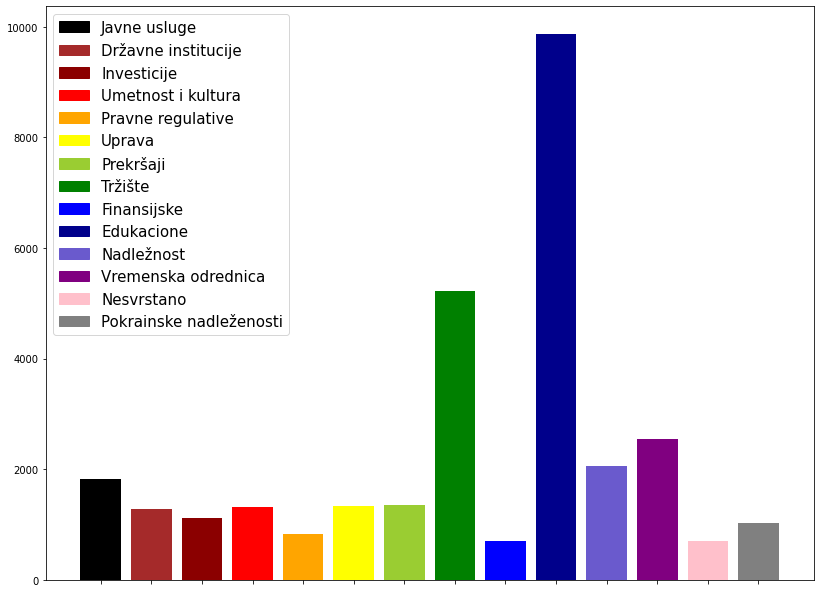

In [50]:
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
import matplotlib.patches as mpatches


plt.rcParams["figure.figsize"] = [11.50, 8.50]
plt.rcParams["figure.autolayout"] = True

colours = ['black','brown','darkred','red','orange','yellow', 'yellowgreen','green','blue','darkblue','slateblue','purple','pink','grey']

space = " "
for i in range(14):
  plt.bar(space, topics_total_amount[i], color=colours[i], label=map_topics[i])
  space += " "

#plt.bar([x for x in range(14)], topics_total_amount)

import matplotlib.patches as mpatches

patchs =[]

for i in range(14):
  patchs.append(mpatches.Patch(color=colours[i], label=map_topics[i]))

#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['Februar', 'Mart', 'April', 'Maj', 'Jun', 'Jul', 'Avgust','Septembar', 'Oktobar', 'Novembar', 'Decembar', 'Januar', 'Februar'])
#plt.set_xticklabels([topic for topic in map_topics], rotation='vertical', fontsize=18)

plt.legend(handles=patchs, loc='upper left', prop={'size': 15})

plt.show()

In [51]:
pickle.dump(topics_for_docs,open("/content/drive/MyDrive/pravna/nmf.p", "wb"))
pickle.dump(topics_for_docs,open("/content/drive/MyDrive/pravna/dictionary.p", "wb"))